In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import duckdb
import statistics

In [29]:
resultLoc="queries/batch1/queries10000_20.txt"

In [30]:
exprs = []
with open(resultLoc) as file_in:
        for line in file_in:
            exprs.append(line)

In [31]:
comparators = ["=", "!=", ">", "<", ">=", "<="]
exprSizes = []
for expr in exprs:
    curr = 0
    for ch in expr:
        if ch in comparators:
            curr += 1
    exprSizes.append(curr)

print("Mean: " + str(statistics.mean(exprSizes)))
print("Stddev: " + str(statistics.stdev(exprSizes)))

Mean: 5.415092853123242
Stddev: 3.4574248100362714


In [32]:
con = duckdb.connect(database=':memory:')
con.execute('CREATE TABLE data AS SELECT * FROM read_csv_auto(\'adult/discrete.csv\')')
con.execute('SET threads TO 1')

resultSizes = []

for expr in exprs:
    result = con.execute(expr).fetchall()
    resultSizes.append(len(result))

print(resultSizes)

[3650, 2529, 2002, 1576, 2457, 886, 129, 2350, 0, 2371, 3917, 0, 46, 0, 1655, 33, 1908, 0, 3577, 315, 509, 4056, 1989, 20, 3880, 1472, 70, 1863, 903, 858, 2225, 272, 594, 10, 114, 0, 11, 68, 0, 277, 2517, 0, 5, 4779, 594, 2809, 3066, 5, 80, 0, 34, 2446, 779, 56, 223, 422, 1078, 611, 589, 17, 1988, 0, 4614, 3, 4883, 11, 675, 663, 10, 174, 1, 241, 4559, 0, 168, 605, 1274, 1327, 3566, 1357, 0, 4615, 840, 0, 1363, 871, 1324, 2081, 0, 37, 2072, 37, 709, 480, 3464, 3890, 3192, 4631, 3866, 714, 0, 268, 3517, 0, 3541, 52, 3058, 2, 2271, 1753, 14, 3, 25, 88, 76, 63, 3739, 4053, 9, 2028, 2482, 4311, 1192, 0, 2687, 839, 3421, 0, 725, 0, 2696, 1941, 369, 3048, 1444, 130, 24, 2799, 4342, 1153, 148, 60, 858, 1173, 105, 7, 1118, 1117, 4557, 2251, 1397, 0, 942, 2, 167, 0, 841, 3161, 2550, 0, 3, 4392, 13, 4049, 2988, 1, 4, 321, 0, 1996, 1863, 770, 2909, 0, 4820, 1328, 2811, 1636, 145, 247, 88, 1193, 3201, 4685, 3742, 310, 0, 4423, 1953, 7, 196, 4737, 64, 1662, 3276, 139, 0, 1981, 2127, 3204, 3049, 3828

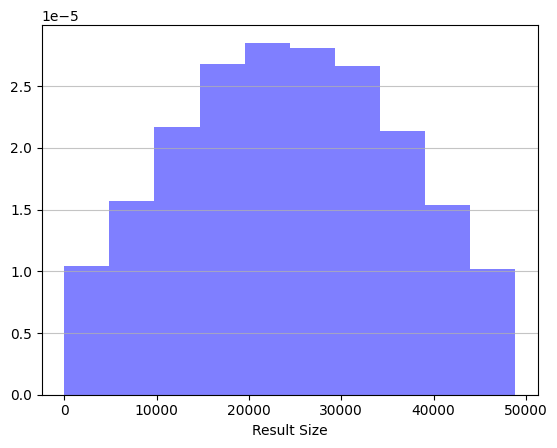

In [33]:
plotData = np.array(resultSizes)

plt.hist(plotData, 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.xlabel('Result Size')
plt.ylabel('')
plt.grid(axis='y', alpha=0.75)

plt.show()